In [1]:
import geopandas as gpd
import rasterio as rio
from rasterio import mask
import matplotlib.pyplot as plt
import numpy as np
##11月28日，学习：在QGIS中画水体与陆地的样本
##再在VS中：制作样本

In [2]:
path_sam_water = 'E:\开源\\1128\water.gpkg'
path_sam_land = 'E:\开源\\1128\land.gpkg'
path_rsimg = 'E:\开源\cg_20.tif'

In [3]:
sam_wat = gpd.read_file(path_sam_water)
sam_land = gpd.read_file(path_sam_land)
print(sam_land.shape)
print(sam_wat.shape)

(12, 1)
(18, 1)


In [4]:
rsimg_rio = rio.open(path_rsimg)
rsimg_rio.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 1490,
 'height': 1631,
 'count': 6,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 47N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",99],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(20.0, 0.0, 874420.0,
        0.0, -20.0, 2769600.0)}

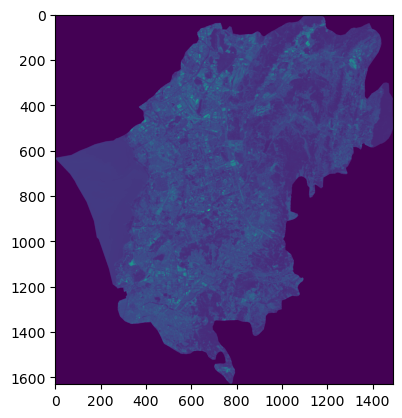

In [5]:
plt.imshow(rsimg_rio.read(1))

In [6]:
masked_img_wat, transform_masked_img_wat = mask.mask(
    rsimg_rio,
    sam_wat.geometry,
    crop=True,
    nodata=0)

masked_img_land,transform_masked_img_land = mask.mask(
    rsimg_rio,
    sam_land.geometry,
    crop=True,
    nodata=0)

ValueError: Input shapes do not overlap raster.

In [8]:
plt.imshow(masked_img_wat[0])

NameError: name 'masked_img_wat' is not defined

In [ ]:
ids_wat = np.where(masked_img_wat[0]!= 0)
fea_wat = masked_img_wat[:, ids_wat[0], ids_wat[1]]
print(fea_wat.shape)

NameError: name 'masked_img_wat' is not defined

In [ ]:
ids_land = np.where(masked_img_land[0]!= 0)
fea_land = masked_img_wat[:, ids_land[0], ids_land[1]]
print(fea_land.shape)

In [ ]:
##把得到的两个数据合并为一个
feas = np.concatenate([fea_wat, fea_land], axis=1)
feas = feas.transpose(1,0)
feas .shape

In [ ]:
##获取以上合并完的样本的标签
##要把水体用数字表示，此处用0代表水体，1代表陆地
##初始化一个0的矩阵，标签个数要和水体样本个数对应，陆地同理
label_wat = np.full(shape=fea_wat.shape[1],fill_value=0)
label_land = np.full(shape=fea_land.shape[1],fill_value=1)

In [ ]:
##合并标签，注意合并次序要与合并特征时一致，合并要素时是水体在前
labels =np.concatenate([label_wat, label_land])
labels = labels[:,np.newaxis]
labels.shape


In [ ]:
sams =np.concatenate([feas,labels],axis=1)
sams.shape
sams

In [ ]:
np.save('E:\开源\\1128\sams_array.npy', sams)
##大气校正，几何校正用开源比较难做，即需要用到物理的